## Projecting the Growth of Infected Individuals from Confirmed Cases with COVID-19 in the Philippines

by: [Chris Monterola](https://chrismonterola.net) and [Erika Legara](https://erikalegara.site)

### What's this about?
Indeed, this is a new kind of war we are fighting. "New" to our generation, at least — the **COVID-19 virus**.

It's crazy how in late December and early January we were just watching and following the news on how the virus has gripped China. It wasn't until 30 January 2020 when we had the first *confirmed* case in the Philippines. Until the 5th of March 2020, we only had 6 confirmed cases. We were fine. Then, things developed really fast from there; now, we are at 140 confirmed cases. Now, we are on an enhanced community quarantine.

In this post, we implement an elementary mathematical model that allows us to project the potential growth of confirmed cases. 

### Findings

As of this writing, 16 March 2020, we expect that for the Philippines, the number of infected individuals will grow to more than 1,600 in a week's time. And, if the dynamics does not change/improve, it can **reach up to 18,300 the week after that**. Remember though that we do not have enough kits to test this number of individuals. Expect that the number of confirmed cases to be reported will be lower than this.

Why should we be worried? 

Many reasons but most importantly, we're worried because this number is not something we believe our healthcare system can handle. In Metro Manila, 800 people struggled for one hospital bed or a 1:800 ratio; and, we were short by 42,000 hospital beds. This number may have already improved since 2017, but we are still worried about the nationwide distribution and accessibility of these facilities.

Where can we put another 26,000 potentially infected patients who are highly contagious?


#### The Data and the Math have spoken.
Empirical data show that we have an almost perfect exponential growth (see the figure below plotted in a semi-log scale). To compare across country trends, we set all of today's (16 March 2020) datapoints to Day 20, and make projections until 30 March 2020.

<img src="Growth of COVID Infected Indviduals.png" width="100%">

#### How confident and accurate are we?
We are not the ones talking here; it's the math and the data.

Why an exponential distribution, and when do we normally expect to get an exponential distribution? Short answer is when the infection spreads at rate $r$ that is proportional to the number of the infected population. This is a valid approximation as long as the number of infected individuals are far less compared to the total population. 

For example, if there is $y_0$ initial number of individuals infected at time $t=0$, at time $t=1$ this number will grow to $y_1 = y_0 + ry_0 = y_0 (1 + r)$. For time $t = 2$, the total number of infected will be $y_2 = y_1 + r y_1 = y_0 (1 + r)^2$. In general, we can get the number of infected individuals at time t using the formula: $y_t = y_0 (1 + r )^t$ . By some forces of mathematics, this can be expressed as an exponential: $y(t) = a \exp(bt)$ where the rate $r = \exp (b) - 1$, and the doubling time is given by $t_{\texttt{double}} = \ln(2) / \ln (1+r)$. We illustrate roughly the outcome below for $r = 0.5$ and $y_0=5$. 

<img src="exp-illustration.png" width="80%">

As seen in all countries, for 10-14 days such exponential trend has been preserved. What differentiates South Korea and Singapore from other countries was how the exponential trajectory was stunted in less than two weeks due to widespread virus testing and social distancing measures that were implemented early.

*Is it then  possible to project when the outbreak peaks?*

It depends. But ones we have enough data and the logistic curve (S-curve) will start to appear, then *likely* yes, we can project. So far though the exponential forecast holds quite well. 


#### Will this trend change?

Yesterday, Metro Manila was placed under community quarantine. And today, it was just announced that we will be under an "enhanced" community quarantine. Will this be effective? Will this stunt the exponential growth we're seeing, the way South Korea flattened its curve? 
Probably. Hopefully. 

We'll only really know once we see changes in the trend (i.e., when we see the trend deviate from its current exponential growth curve) in the next week or so. We have observed that Italy eventually decreased the doubling period from an initial of 1.5 days to about 3.6 days in the last ten days. If such is applied to the Philippine setting and we slow down the doubling to about 4 days, then the projection will be halved to about 805 cases by March 23 and 9,150 by March 30.


#### How much could we be under reporting?

We can only speculate at this point; however, using South Korea as baseline and assuming that (1) the distribution in terms of age of that population holds and (2) only symptomatic patients are being tested in the Philippines (most probably 55+ and above), this make sense since the age bracket 40 years and below only has $~0.2\%$ mortality rate while for 60 and above, the mortality rate shoots up to within $10\%$. This is ~50 fold increase. 

With such assumption, a first order approximation of the under reported cases in the Philippines is: Age below 55 (not tested) / Age above 55 (tested). Looking at the Philippine Statistics Authority data, this is about 90% / 10% or 9x. The assumption here is we are not detecting 9x of infected because they are not going to hospitals for check-up.

## For those interested in the math and the code...

### Data

The dataset was downloaded from the [World Health Organization](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/). 

We did not any more look at the veracity of all WHO collected data, but we did zoom in on the Philippines. We noticed that data on the Philippines had errors; so, these were corrected as well. 

---

Let's begin, and import the needed Python libraries. We also define here our fave color palette.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

tab10 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', 
         '#8C564B', '#CFECF9', '#7F7F7F', '#BCBD22', '#17BECF']

%matplotlib inline

Here's the data.

In [2]:
df = pd.read_csv('full_data.csv')
df.head(n=3)

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2/25/20,Afghanistan,NaN,NaN,1,NaN
1,2/26/20,Afghanistan,0.0,NaN,1,NaN
2,2/27/20,Afghanistan,0.0,NaN,1,NaN


Let's look at the countries.

In [3]:
df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guadeloupe', 'Guernsey', 'Guinea',
       'Guyana', 'Vatican', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 6 columns):
date            2408 non-null object
location        2408 non-null object
new_cases       2272 non-null float64
new_deaths      418 non-null float64
total_cases     2408 non-null int64
total_deaths    455 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 113.0+ KB


In [5]:
df.date = pd.to_datetime(df.date)

Notice as well that there's a couple of `NaN`s in this dataset. Let's fix that.

In [6]:
df = df.fillna(0)
df.head(n=3)

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0


In this notebook, we're interested in the number and growth of  `total_cases`. 

Now, we're ready to begin.

## Fitting the Model

### Data Exploration

Let's have a peek at our data.

In [7]:
italy = df[(df.location=='Italy') & (df.total_cases >= 100)].total_cases.to_list()
skor = df[(df.location=='South Korea') & (df.total_cases >= 100)].total_cases.to_list()
iran = df[(df.location=='Iran') & (df.total_cases >= 100)].total_cases.to_list()
germany = df[(df.location=='Germany') & (df.total_cases >= 100)].total_cases.to_list()
switzerland = df[(df.location=='Switzerland') & (df.total_cases >= 100)].total_cases.to_list()
usa = df[(df.location=='United States') & (df.total_cases >= 100)].total_cases.to_list()

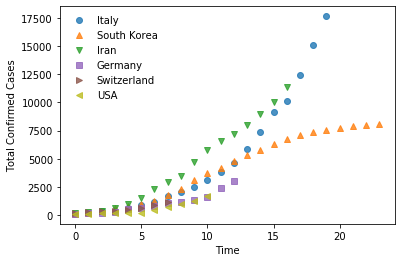

In [8]:
plt.plot(italy, 'o',
         color=tab10[0], alpha = 0.8, label='Italy');
plt.plot(skor, '^', 
         color=tab10[1], alpha = 0.8, label='South Korea');
plt.plot(iran, 'v', 
         color=tab10[2], alpha = 0.8, label='Iran');
plt.plot(germany, 's',   
         color=tab10[4], alpha = 0.8, label='Germany');
plt.plot(switzerland, '>', 
         color=tab10[5], alpha = 0.8, label='Switzerland');
plt.plot(usa, '<', 
         color=tab10[8], alpha = 0.8, label='USA');

plt.legend(frameon=False);
plt.xlabel('Time');
plt.ylabel('Total Confirmed Cases');

With Italy, Iran, and Germany, the trends look exponential. On the other hand, South Korea looks very much like a logistic curve. Thus, we'll use both in this exploration. We will definitely start using the logistic curve for the Philippines ones we see a slowing down in the increase of the number of confirmed/reported cases. 

Further, to properly compare  trends, we trim the data points such that today will be set to Day 20; in addition, we the first data point will be that when it reaches its first (or equal to) 100 cases. We then make projections until 30 March 2020. 

#### The Philippines
Compared to the other trends above, the Philippines is a little "lagging"; we have, as of this writing, just breached 100 confirmed cases (20 March 2020). And here's the trend.

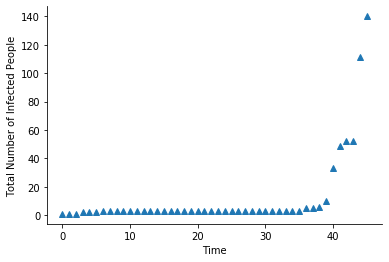

In [9]:
plt.plot(df[(df.location=='Philippines')].total_cases.to_list(), '^', 
         color=tab10[0], label='Philippines');
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Time', size=10);
plt.ylabel('Total Number of Infected People', size=10);

Looking at the most recent 20 datapoints...

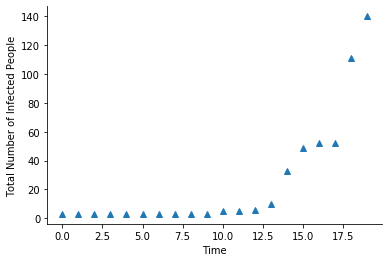

In [10]:
plt.plot(df[(df.location=='Philippines')].total_cases.to_list()[-20:], '^', 
         color=tab10[0], label='Philippines');
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Time', size=10);
plt.ylabel('Total Number of Infected People', size=10);

### Trend Fitting

First approximation of spreading is that it will be transmitted randomly with a rate $r$ in time $t$ which can be expressed as:

\begin{equation}
y = y_0 (1 + r)^t
\end{equation}


where $y$ is the infected population at time $t$ and $y_0$ is the initial population. Note that this immediately follows from the fact that at t=1 the number of infected is given by $y_{t=1}=y_0 + r y_0 = y_0 (1 + r)$, at $t=2$ this becomes $y_{t=2}= y_0 (1 + r) + r y_0 (1 + r) = y_0 (1 + r)^2$, and by intuition we can get the above expression.

By algebraic manipulation it can be rewritten as:

\begin{equation}
y = y_0 \exp^{bt}
\end{equation}

where the rate r is derivable as:

\begin{equation}
r=\exp^{b}-1
\end{equation}

Or more intuitively, the infected population will double every:

\begin{equation}
t_{double}= \frac{\ln(2)}{\ln(1+r)}
\end{equation}


Below we plot the projection based on the assumption that COVID19 is transmitted randomly to a given population. If the data we are seeing are simply based on the infected before the lockdown, then we expect this to continue for about 11.5 days at least, the incubation period of the COVID19!

In [11]:
def exponential(x,a,b):
    return a * np.exp(b*x)

def logistic(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

Time to plot our results.

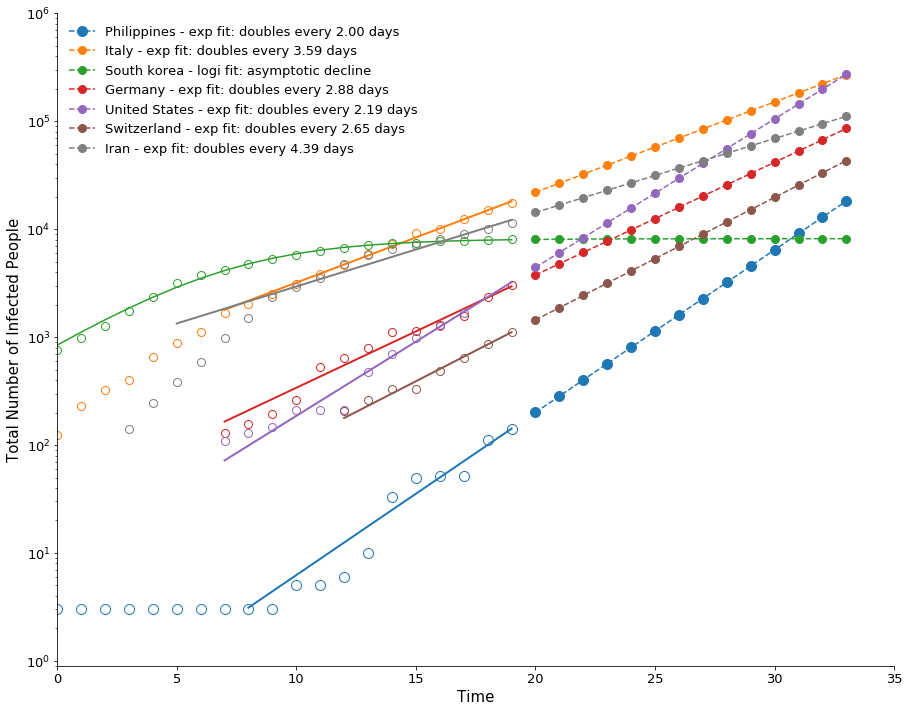

In [12]:
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 13})

#PHILIPPINES
y = df[(df.location=='Philippines')].total_cases.to_list()
y=y[-20:]
x = np.arange(0, len(y))
popt, pcov = curve_fit(exponential, x, y, p0 = [0, 0])

x_fit = np.arange(8, len(y))
y_exp_fit = exponential(x_fit, *popt)

x_projection = np.arange(len(y), len(y)+14)
y_projection=exponential(x_projection, *popt)

rate_RP=(np.exp(tuple(popt)[1]))-1
double_RP= np.log(2)/np.log(1+ rate_RP)

plt.semilogy(x,y,'o', ms=10, markerfacecolor='none', color = tab10[0]);
plt.semilogy(x_projection,y_projection,'o--', ms=10, color = tab10[0], 
         label='Philippines - exp fit: doubles every %.2f days' % double_RP)
plt.semilogy(x_fit, y_exp_fit,'-', lw=2, color = tab10[0])


#ITALY
y = italy
x = np.arange(0, len(y))

popt, pcov = curve_fit(exponential, x, y, p0 = [0,0])
x_fit = np.arange(7, len(y))
y_exp_fit = exponential(x_fit, *popt)

x_projection = np.arange(len(y), len(y)+14)
y_projection=exponential(x_projection, *popt)

rate_Italy=(np.exp(tuple(popt)[1]))-1
double_Italy= np.log(2)/np.log(1+ rate_Italy)

plt.semilogy(x,y,'o', ms=8, markerfacecolor='none', color = tab10[1])
plt.semilogy(x_projection,y_projection,'o--', ms=8, color = tab10[1], 
         label='Italy - exp fit: doubles every %.2f days' % double_Italy)
plt.semilogy(x_fit, y_exp_fit,'-', lw=2, color = tab10[1]) 


#SOUTH KOREA
y = skor
y=y[-20:]
x = np.arange(0, len(y))

#popt, pcov = curve_fit(exponential, x, y, p0 = [0, 0])
popt2, pcov2 = curve_fit(logistic, x, y, p0 = [3.5,50,5000])

x_fit = np.arange(0, 20)
y_exp_fit = exponential(x_fit, *popt)
y_logi_fit = logistic(x_fit, *popt2)

x_projection = np.arange(len(y), len(y)+14)
y_projection=logistic(x_projection, *popt2)

#plt.semilogy(x_fit, y_exp_fit,'--', lw=2, color = tab10[0],
#         label='exp fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.semilogy(x_projection,y_projection,'o--', ms=8, color = tab10[2], label='South korea - logi fit: asymptotic decline')
plt.semilogy(x_fit,y_logi_fit,'-', ms=8, color = tab10[2])
plt.semilogy(x,y,'o', ms=8, markerfacecolor='none', color = tab10[2])

#GERMANY
y = germany
x = np.arange(7, len(y)+7)
popt, pcov = curve_fit(exponential, x, y, p0 = [0, 0])
x_fit = np.arange(7, 20)
y_exp_fit = exponential(x_fit, *popt)

x_projection = np.arange(len(y)+7, len(y)+14+7)
y_projection=exponential(x_projection, *popt)

rate_Germany=(np.exp(tuple(popt)[1]))-1
double_Germany= np.log(2)/np.log(1+ rate_Germany)

plt.semilogy(x,y,'o', ms=8, markerfacecolor='none',  color = tab10[3])
plt.semilogy(x_projection,y_projection,'o--', ms=8, color = tab10[3],label='Germany - exp fit: doubles every %.2f days' % double_Germany)
plt.semilogy(x_fit, y_exp_fit,'-', lw=2, color = tab10[3])

# USA
y = usa
x = np.arange(7, len(y)+7)
popt, pcov = curve_fit(exponential, x, y, p0 = [0, 0])
x_fit = np.arange(7, 20)
y_exp_fit = exponential(x_fit, *popt)

x_projection = np.arange(len(y)+9, len(y)+14+9)
y_projection=exponential(x_projection, *popt)

rate_USA=(np.exp(tuple(popt)[1]))-1
double_USA= np.log(2)/np.log(1+ rate_USA)

plt.semilogy(x,y,'o', ms=8, color = tab10[4],  markerfacecolor='none')
plt.semilogy(x_projection,y_projection,'o--', ms=8, color = tab10[4],
             label='United States - exp fit: doubles every %.2f days' % double_USA)
plt.semilogy(x_fit, y_exp_fit,'-', lw=2, color = tab10[4])

#SWISS
y = switzerland
x = np.arange(12, len(y)+12)
popt, pcov = curve_fit(exponential, x, y, p0 = [0, 0])
x_fit = np.arange(12, 20)
y_exp_fit = exponential(x_fit, *popt)

x_projection = np.arange(len(y)+12, len(y)+14+12)
y_projection=exponential(x_projection, *popt)


rate_Swiss=(np.exp(tuple(popt)[1]))-1
double_Swiss= np.log(2)/np.log(1+ rate_Swiss)

plt.semilogy(x,y,'o', ms=8, markerfacecolor='none',  color = tab10[5])
plt.semilogy(x_projection,y_projection,'o--', ms=8, color = tab10[5],label='Switzerland - exp fit: doubles every %.2f days' % double_Swiss)
plt.semilogy(x_fit, y_exp_fit,'-', lw=2, color = tab10[5])

#IRAN
y = iran
x = np.arange(3, len(y)+3)
popt, pcov = curve_fit(exponential, x, y, p0 = [0, 0])
x_fit = np.arange(5, len(y)+3)
y_exp_fit = exponential(x_fit, *popt)

x_projection = np.arange(len(y)+3, len(y)+14+3)
y_projection=exponential(x_projection, *popt)

rate_Iran=(np.exp(tuple(popt)[1]))-1
double_Iran= np.log(2)/np.log(1+ rate_Iran)

plt.semilogy(x,y,'o', ms=8, markerfacecolor='none',  color = tab10[7])
plt.semilogy(x_projection,y_projection,'o--', ms=8, color = tab10[7],
             label='Iran - exp fit: doubles every %.2f days' % double_Iran)
plt.semilogy(x_fit, y_exp_fit,'-', lw=2, color = tab10[7])

plt.legend(frameon=False)
plt.xlim(0, 35)
plt.ylim(0.9, 1000000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Time', size=15);
plt.ylabel('Total Number of Infected People', size=15);
plt.savefig('Growth of COVID Infected Indviduals.png', dpi=150)

The above data implies that based on the trend, about 58 new COVID19 positive patients will be reported in March 18 or two days from now doubling the 29 cases reported today. Using this projection the total cumulative patients will be 1,611 by March 23 then 18,300 by march 30 and we will end the month (March 31) with 25,894 cases. Again, the assumption here is that we'd **fail to contain the random spread of the virus.**